In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from abelfunctions import RiemannTheta

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse, crossentropy
import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

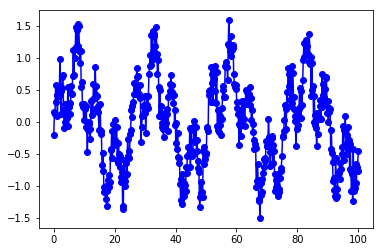

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [4]:
M = mdl.Model()
M.add(layers.ThetaUnitLayer(1,3))
M.add(layers.ThetaUnitLayer(3,3))
M.add(layers.ThetaUnitLayer(3,1))

In [5]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

CMA on 16 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=802727, Sun Oct 22 22:05:23 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 1.205252360713227e+00 1.0e+00 9.19e-01  9e-01  9e-01 0:00.6
    2     28 5.792448671495414e-01 1.1e+00 8.76e-01  9e-01  9e-01 0:01.0
    3     42 4.957966039470896e-01 1.1e+00 8.38e-01  8e-01  8e-01 0:01.5
   10    140 4.381507072821800e-01 1.2e+00 6.95e-01  7e-01  7e-01 0:04.5
   20    280 4.374523373127130e-01 1.4e+00 6.98e-01  7e-01  7e-01 0:08.7
   32    448 4.300450849800693e-01 1.5e+00 6.59e-01  6e-01  7e-01 0:13.7
   47    658 4.338044049312197e-01 1.7e+00 6.41e-01  6e-01  7e-01 0:20.0
   64    896 4.369410189281716e-01 1.8e+00 5.72e-01  5e-01  6e-01 0:27.1
   84   1176 4.350241112306309e-01 1.9e+00 4.44e-01  4e-01  5e-01 0:35.5
  100   1400 4.306198827550057e-01 1.9e+00 3.95e-01  3e-01  4e-01 0:42.1
  125   1750 4.321737041758505e-01 1.9e+00 2.70e-01  2e-01  3e-01 0:52.5
  152   

array([  9.01545893e-01,   3.23924052e-01,   9.99120764e-01,
        -2.48563843e-02,  -2.31950931e-01,  -3.67586647e-01,
         3.76226134e-01,   5.83614160e+00,   2.32221915e+00,
        -2.14805009e-01,   6.64060411e-01,  -9.86101309e-01,
         7.53244342e-02,   7.54222742e-01,  -9.60873971e-01,
         1.76707177e-01,  -8.52910785e-01,  -6.18418342e-01,
        -1.93305533e-01,   9.11276975e-02,   9.63501093e-01,
         5.40936156e-01,   7.29381172e+00,   1.56562470e+00,
        -1.12734287e-02,   1.17716599e-01,   5.09683080e-05,
         9.83147295e-02,   3.90066569e-05])

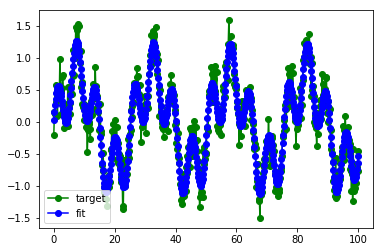

In [6]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.ThetaUnitLayer(1,3))
M.add(layers.ThetaUnitLayer(3,3))
M.add(layers.ThetaUnitLayer(3,2))
M.add(layers.ThetaUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.ThetaUnitLayer(1,100))
#M.add(layers.ThetaUnitLayer(3,3))
#M.add(layers.ThetaUnitLayer(3,2))
#M.add(layers.ThetaUnitLayer(2,1))

minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [24]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:1000,0]
X_train = MNIST_train[0:1000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [44]:
M = mdl.Model()
M.add(layers.ThetaUnitLayer(784,10))
M.add(layers.ThetaUnitLayer(10,1))


#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#T=enc.transform(Y_train)

# ToDo: Use cross-entropy

In [ ]:
minim = minimizer.CMA(True)

minim.train(mse,M, np.transpose(X_train), np.transpose(Y_train), maxiter=100)

CMA on 16 cpu(s) enabled
(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 7872 (seed=798359, Sun Oct 22 23:36:36 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 1.456299343796274e+01 1.0e+00 9.99e-01  1e+00  1e+00 0:05.5
    2     60 1.842609353320590e+01 1.0e+00 9.97e-01  1e+00  1e+00 0:11.0
    3     90 1.165484415550777e+01 1.0e+00 9.96e-01  1e+00  1e+00 0:16.3
    4    120 1.102737817262295e+01 1.0e+00 9.95e-01  1e+00  1e+00 0:21.6
    5    150 1.038251601500165e+01 1.0e+00 9.94e-01  1e+00  1e+00 0:27.1
    6    180 1.027421310044553e+01 1.0e+00 9.93e-01  1e+00  1e+00 0:32.7


In [ ]:
P=np.real(M.predict(np.transpose(X_test)))

#where_are_NaNs = np.isnan(P)
#P[where_are_NaNs] = 0
P = np.abs(np.round(P))
#P=P.reshape(P.shape[0],)

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))